In [14]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
pd.set_option('display.max_columns', 500)

In [15]:
credit = pd.read_csv('credit_model.csv')

In [16]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,DEFAULT,RISK_VALUE,BILL_VALUE,RISK_VALUE_AVG,RISK_VALUE_CAT
0,1,20000,Female,University,Married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,-2,-3102,-0.333333,1
1,2,120000,Female,University,Single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,3,-11395,0.500000,2_5
2,3,90000,Female,University,Single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,-66396,0.000000,1
3,4,50000,Female,University,Married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,-176956,0.000000,1
4,5,50000,Male,University,Married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,-2,-42352,-0.333333,1


In [17]:
credit = credit[credit['LIMIT_BAL']<=800000]

In [18]:
df = credit[credit['LIMIT_BAL']<=800000].drop(columns = 'ID')
df_dummy = pd.get_dummies(df, drop_first = True)

In [19]:
df_dummy.head()

,LIMIT_BAL,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,DEFAULT,RISK_VALUE,BILL_VALUE,RISK_VALUE_AVG,SEX_Male,EDUCATION_High School,EDUCATION_Others,EDUCATION_University,EDUCATION_Unknown,MARRIAGE_Others,MARRIAGE_Single,MARRIAGE_Unknown,RISK_VALUE_CAT_10+,RISK_VALUE_CAT_2_5,RISK_VALUE_CAT_6_10
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,-2,-3102,-0.333333,0,0,0,1,0,0,0,0,0,0,0
1,120000,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,3,-11395,0.500000,0,0,0,1,0,0,1,0,0,1,0
2,90000,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,-66396,0.000000,0,0,0,1,0,0,1,0,0,0,0
3,50000,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,-176956,0.000000,0,0,0,1,0,0,0,0,0,0,0
4,50000,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,-2,-42352,-0.333333,1,0,0,1,0,0,0,0,0,0,0


In [20]:
df_train, df_test = train_test_split(df_dummy, test_size = 0.3, random_state = 42)

In [21]:
scaler = MinMaxScaler()
xtrain = scaler.fit_transform(df_train.drop(columns = 'DEFAULT'))
ytrain = df_train['DEFAULT']
xtest = scaler.transform(df_test.drop(columns = 'DEFAULT'))
ytest = df_test['DEFAULT']

In [22]:
lr = LogisticRegression()

In [23]:
df_train.shape

(20999, 35)

In [24]:
#xtrain

In [25]:
rfe = RFE(lr, n_features_to_select= 1)
rfe.fit(xtrain,ytrain)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='warn', n_jobs=None, penalty='l2',
                                 random_state=None, solver='warn', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=1, step=1, verbose=0)

In [26]:
#np.array([rfe.ranking_, df.columns])

In [27]:
list(zip(df_train.drop(columns = 'DEFAULT').columns, rfe.ranking_))

[('LIMIT_BAL', 18),
 ('AGE', 25),
 ('PAY_SEP', 1),
 ('PAY_AUG', 17),
 ('PAY_JUL', 19),
 ('PAY_JUN', 11),
 ('PAY_MAY', 27),
 ('PAY_APR', 12),
 ('BILL_AMT_SEP', 24),
 ('BILL_AMT_AUG', 23),
 ('BILL_AMT_JUL', 22),
 ('BILL_AMT_JUN', 21),
 ('BILL_AMT_MAY', 7),
 ('BILL_AMT_APR', 26),
 ('PAY_AMT_SEP', 2),
 ('PAY_AMT_AUG', 3),
 ('PAY_AMT_JUL', 4),
 ('PAY_AMT_JUN', 20),
 ('PAY_AMT_MAY', 5),
 ('PAY_AMT_APR', 6),
 ('RISK_VALUE', 33),
 ('BILL_VALUE', 16),
 ('RISK_VALUE_AVG', 30),
 ('SEX_Male', 29),
 ('EDUCATION_High School', 31),
 ('EDUCATION_Others', 15),
 ('EDUCATION_University', 32),
 ('EDUCATION_Unknown', 14),
 ('MARRIAGE_Others', 34),
 ('MARRIAGE_Single', 28),
 ('MARRIAGE_Unknown', 8),
 ('RISK_VALUE_CAT_10+', 9),
 ('RISK_VALUE_CAT_2_5', 13),
 ('RISK_VALUE_CAT_6_10', 10)]

## PCA on BILL_AMT

In [28]:
credit['LIMIT_BAL_CAT'] = pd.cut(credit['LIMIT_BAL'], bins=[0,49000,150000,600000,1500000],labels=["LOW","L_M","MEDIUM","HIGH"])

In [29]:
df_low = credit[credit['LIMIT_BAL_CAT']=='LOW']
df_lm = credit[credit['LIMIT_BAL_CAT']=='L_M']
df_med = credit[credit['LIMIT_BAL_CAT']=='MEDIUM']
df_high = credit[credit['LIMIT_BAL_CAT']=='HIGH']

In [30]:
pca = PCA(n_components=2, random_state = 42)

In [31]:
df_low_pca_bill = pd.DataFrame(pca.fit_transform(df_low[['BILL_AMT_APR', 'BILL_AMT_MAY', 'BILL_AMT_JUN', 'BILL_AMT_JUL', 'BILL_AMT_AUG', 'BILL_AMT_SEP']]),columns = ['PC1_BILL', 'PC2_BILL'])
df_lm_pca_bill = pd.DataFrame(pca.fit_transform(df_lm[['BILL_AMT_APR', 'BILL_AMT_MAY', 'BILL_AMT_JUN', 'BILL_AMT_JUL', 'BILL_AMT_AUG', 'BILL_AMT_SEP']]),columns = ['PC1_BILL', 'PC2_BILL'])
df_med_pca_bill = pd.DataFrame(pca.fit_transform(df_med[['BILL_AMT_APR', 'BILL_AMT_MAY', 'BILL_AMT_JUN', 'BILL_AMT_JUL', 'BILL_AMT_AUG', 'BILL_AMT_SEP']]),columns = ['PC1_BILL', 'PC2_BILL'])
df_high_pca_bill = pd.DataFrame(pca.fit_transform(df_high[['BILL_AMT_APR', 'BILL_AMT_MAY', 'BILL_AMT_JUN', 'BILL_AMT_JUL', 'BILL_AMT_AUG', 'BILL_AMT_SEP']]),columns = ['PC1_BILL', 'PC2_BILL'])

In [32]:
pca.explained_variance_ratio_

array([0.89014011, 0.07366882])

In [33]:
pca.n_features_

6

- removing all the bill amount columns and putting these two columns only

In [34]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,DEFAULT,RISK_VALUE,BILL_VALUE,RISK_VALUE_AVG,RISK_VALUE_CAT,LIMIT_BAL_CAT
0,1,20000,Female,University,Married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,-2,-3102,-0.333333,1,LOW
1,2,120000,Female,University,Single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,3,-11395,0.500000,2_5,L_M
2,3,90000,Female,University,Single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,-66396,0.000000,1,L_M
3,4,50000,Female,University,Married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,-176956,0.000000,1,L_M
4,5,50000,Male,University,Married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,-2,-42352,-0.333333,1,L_M


In [35]:
df_pca = credit.drop(columns = ['BILL_AMT_APR', 'BILL_AMT_MAY', 'BILL_AMT_JUN', 'BILL_AMT_JUL', 'BILL_AMT_AUG', 'BILL_AMT_SEP'])
df_pca[['PC1_BILL', 'PC2_BILL']] = df_pca_bill[['PC1_BILL','PC2_BILL']]

NameError: name 'df_pca_bill' is not defined

## Applying Modeling again

In [206]:
credit['RISK_VALUE_CAT'].unique()

array(['1', '2_5', '6_10', '10+'], dtype=object)

In [227]:
df_low['RISK_VALUE_CAT'].replace(['1','2_5','6_10','10+'], [0,1,2,3], inplace = True)
df_lm['RISK_VALUE_CAT'].replace(['1','2_5','6_10','10+'], [0,1,2,3], inplace = True)
df_med['RISK_VALUE_CAT'].replace(['1','2_5','6_10','10+'], [0,1,2,3], inplace = True)
df_high['RISK_VALUE_CAT'].replace(['1','2_5','6_10','10+'], [0,1,2,3], inplace = True)

C:\Users\Dharmendra\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [228]:
df_low_dummy = pd.get_dummies(df_low, drop_first=True)
df_lm_dummy = pd.get_dummies(df_lm, drop_first=True)
df_med_dummy = pd.get_dummies(df_med, drop_first=True)
df_high_dummy = pd.get_dummies(df_high, drop_first=True)

In [209]:
df_dummy.shape

(29999, 30)

In [230]:
df_low_train, df_low_test = train_test_split(df_low_dummy.drop(columns = 'ID'), test_size = 0.3, random_state = 42)
df_lm_train, df_lm_test = train_test_split(df_lm_dummy.drop(columns = 'ID'), test_size = 0.3, random_state = 42)
df_med_train, df_med_test = train_test_split(df_med_dummy.drop(columns = 'ID'), test_size = 0.3, random_state = 42)
df_high_train, df_high_test = train_test_split(df_high_dummy.drop(columns = 'ID'), test_size = 0.3, random_state = 42)

In [231]:
scaler = MinMaxScaler()
x_low_train = scaler.fit_transform(df_low_train.drop(columns = 'DEFAULT'))
y_low_train = df_low_train['DEFAULT']
x_low_test = scaler.transform(df_low_test.drop(columns = 'DEFAULT'))
y_low_test = df_test["DEFAULT"]

C:\Users\Dharmendra\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [232]:
scaler = MinMaxScaler()
x_lm_train = scaler.fit_transform(df_lm_train.drop(columns = 'DEFAULT'))
y_lm_train = df_lm_train['DEFAULT']
x_lm_test = scaler.transform(df_lm_test.drop(columns = 'DEFAULT'))
y_lm_test = df_test["DEFAULT"]

C:\Users\Dharmendra\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [233]:
scaler = MinMaxScaler()
x_med_train = scaler.fit_transform(df_med_train.drop(columns = 'DEFAULT'))
y_med_train = df_med_train['DEFAULT']
x_med_test = scaler.transform(df_med_test.drop(columns = 'DEFAULT'))
y_med_test = df_test["DEFAULT"]

C:\Users\Dharmendra\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [234]:
scaler = MinMaxScaler()
x_high_train = scaler.fit_transform(df_high_train.drop(columns = 'DEFAULT'))
y_high_train = df_high_train['DEFAULT']
x_high_test = scaler.transform(df_high_test.drop(columns = 'DEFAULT'))
y_high_test = df_test["DEFAULT"]

C:\Users\Dharmendra\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [357]:
lr = LogisticRegression()
y_pred_train = pd.Series(np.zeros(shape = y_low_train.shape))
for i in range(50):
    lr = LogisticRegression()
    xtrain, xtest, ytrain, ytest = train_test_split(x_low_train,y_low_train, test_size = 0.6, random_state = i)
    lr.fit(xtrain, ytrain)
    y_pred_train = y_pred_train + pd.Series(lr.predict_proba(x_low_train)[:,1]).map(lambda x: 1 if x > 0.375 else 0)

C:\Users\Dharmendra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dharmendra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dharmendra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dharmendra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dharmendra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

C:\Users\Dharmendra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dharmendra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dharmendra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dharmendra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dharmendra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

In [378]:
y_low_pred_train = y_pred_train.map(lambda x: 1 if x>18 else 0)

In [379]:
metrics.accuracy_score(y_low_train, y_low_pred_train)
#metrics.accuracy_score(y_low_test, y_low_pred_test)

0.7139542591978787

In [380]:
metrics.confusion_matrix(y_low_train, y_low_pred_train)

array([[1468,  461],
       [ 402,  686]], dtype=int64)

In [381]:
TP1 = 1468
FP1 = 461
FN1 = 402
TN1 = 686

In [244]:
result = pd.DataFrame()
result['PROB'] = ypred_prob[:,1]
nums = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in nums:
    result[i] = result['PROB'].map(lambda x: 1 if x > i else 0)

In [245]:
result.head()

,PROB,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.562043,1,1,1,1,1,1,0,0,0,0
1,0.391223,1,1,1,1,0,0,0,0,0,0
2,0.211985,1,1,1,0,0,0,0,0,0,0
3,0.507186,1,1,1,1,1,1,0,0,0,0
4,0.281599,1,1,1,0,0,0,0,0,0,0


In [247]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci', 'recall', 'precision', 'f1_score'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

for i in nums:
    cm1 = metrics.confusion_matrix(y_low_train, result[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    recal = metrics.recall_score(y_low_train, result[i])
    preci = metrics.precision_score(y_low_train, result[i])
    f1 = metrics.f1_score(y_low_train, result[i])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci, recal, preci, f1]
print(cutoff_df)

     prob  accuracy     sensi     speci    recall  precision  f1_score
0.0   0.0  0.360623  1.000000  0.000000  1.000000   0.360623  0.530085
0.1   0.1  0.379185  0.998162  0.030067  0.998162   0.367264  0.536959
0.2   0.2  0.487902  0.922794  0.242613  0.922794   0.407302  0.565156
0.3   0.3  0.669208  0.730699  0.634526  0.730699   0.530000  0.614374
0.4   0.4  0.722241  0.589154  0.797304  0.589154   0.621124  0.604717
0.5   0.5  0.715943  0.431985  0.876102  0.431985   0.662906  0.523094
0.6   0.6  0.702022  0.292279  0.933126  0.292279   0.711409  0.414332
0.7   0.7  0.681803  0.169118  0.970969  0.169118   0.766667  0.277108
0.8   0.8  0.653298  0.052390  0.992224  0.052390   0.791667  0.098276
0.9   0.9  0.640040  0.004596  0.998445  0.004596   0.625000  0.009124


<Figure size 1080x576 with 0 Axes>

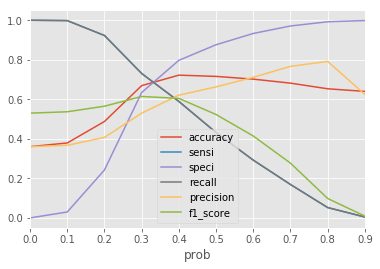

In [248]:
plt.figure(figsize = (15,8))
cutoff_df.plot.line(x = 'prob', y =['accuracy', 'sensi', 'speci', 'recall', 'precision', 'f1_score'])

In [249]:
result['final_pred'] = result['PROB'].map(lambda x: 1 if x>0.375 else 0)

In [251]:
final_low_result = pd.DataFrame(columns = ['LOW_PRED','LOW_TRUE'])
final_low_result['LOW_PRED'] = result['final_pred']
final_low_result['LOW_TRUE'] = y_low_train

In [252]:
lr = LogisticRegression()
lr.fit(x_lm_train, y_lm_train)

C:\Users\Dharmendra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [382]:
lr = LogisticRegression()
y_pred_train = pd.Series(np.zeros(shape = y_lm_train.shape))
for i in range(50):
    lr = LogisticRegression()
    xtrain, xtest, ytrain, ytest = train_test_split(x_lm_train,y_lm_train, test_size = 0.6, random_state = i)
    lr.fit(xtrain, ytrain)
    y_pred_train = y_pred_train + pd.Series(lr.predict(x_lm_train))

C:\Users\Dharmendra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dharmendra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dharmendra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dharmendra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dharmendra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

C:\Users\Dharmendra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dharmendra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dharmendra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dharmendra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dharmendra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

In [392]:
y_lm_pred_train = y_pred_train.map(lambda x: 1 if x>0 else 0)

In [390]:
metrics.accuracy_score(y_lm_train, y_lm_pred_train)
#metrics.accuracy_score(y_lm_test, y_lm_pred_test)

0.8025289529662019

In [393]:
metrics.confusion_matrix(y_lm_train, y_lm_pred_train), metrics.recall_score(y_lm_train, y_lm_pred_train)

(array([[5968,  450],
        [1201,  843]], dtype=int64), 0.412426614481409)

In [255]:
ypred_prob = lr.predict_proba(x_lm_train)

In [256]:
result = pd.DataFrame()
result['PROB'] = ypred_prob[:,1]
nums = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in nums:
    result[i] = result['PROB'].map(lambda x: 1 if x > i else 0)

In [257]:
result.head()

,PROB,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.428855,1,1,1,1,1,0,0,0,0,0
1,0.238450,1,1,1,0,0,0,0,0,0,0
2,0.682935,1,1,1,1,1,1,1,0,0,0
3,0.118563,1,1,0,0,0,0,0,0,0,0
4,0.127101,1,1,0,0,0,0,0,0,0,0


In [258]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci', 'recall', 'precision', 'f1_score'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

for i in nums:
    cm1 = metrics.confusion_matrix(y_lm_train, result[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    recal = metrics.recall_score(y_lm_train, result[i])
    preci = metrics.precision_score(y_lm_train, result[i])
    f1 = metrics.f1_score(y_lm_train, result[i])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci, recal, preci, f1]
print(cutoff_df)

     prob  accuracy     sensi     speci    recall  precision  f1_score
0.0   0.0  0.241550  1.000000  0.000000  1.000000   0.241550  0.389111
0.1   0.1  0.294020  0.974560  0.077283  0.974560   0.251706  0.400080
0.2   0.2  0.722524  0.655088  0.744001  0.655088   0.449027  0.532829
0.3   0.3  0.789175  0.553816  0.864132  0.553816   0.564870  0.559289
0.4   0.4  0.808201  0.454501  0.920848  0.454501   0.646486  0.533755
0.5   0.5  0.801111  0.348337  0.945310  0.348337   0.669802  0.458320
0.6   0.6  0.795084  0.259295  0.965721  0.259295   0.706667  0.379384
0.7   0.7  0.783030  0.159491  0.981614  0.159491   0.734234  0.262058
0.8   0.8  0.761995  0.026908  0.996105  0.026908   0.687500  0.051789
0.9   0.9  0.758095  0.004403  0.998130  0.004403   0.428571  0.008717


<Figure size 1080x576 with 0 Axes>

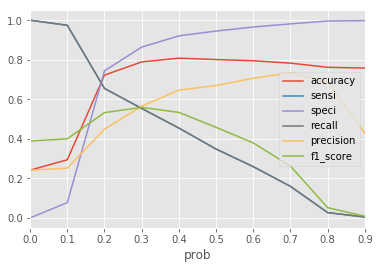

In [259]:
plt.figure(figsize = (15,8))
cutoff_df.plot.line(x = 'prob', y =['accuracy', 'sensi', 'speci', 'recall', 'precision', 'f1_score'])

In [262]:
result['final_pred'] = result['PROB'].map(lambda x: 1 if x>0.3 else 0)

In [263]:
final_lm_result = pd.DataFrame(columns = ['lm_PRED','lm_TRUE'])
final_lm_result['lm_PRED'] = result['final_pred']
final_lm_result['lm_TRUE'] = y_lm_train

In [265]:
lr = LogisticRegression()
lr.fit(x_med_train, y_med_train)

C:\Users\Dharmendra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [266]:
y_med_pred_train = lr.predict(x_med_train)
y_med_pred_test = lr.predict(x_med_test)

In [267]:
metrics.accuracy_score(y_med_train, y_med_pred_train)
#metrics.accuracy_score(y_med_test, y_med_pred_test)

0.8594674556213018

In [268]:
ypred_prob = lr.predict_proba(x_med_train)

In [269]:
result = pd.DataFrame()
result['PROB'] = ypred_prob[:,1]
nums = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in nums:
    result[i] = result['PROB'].map(lambda x: 1 if x > i else 0)

In [270]:
result.head()

,PROB,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.244831,1,1,1,0,0,0,0,0,0,0
1,0.148918,1,1,0,0,0,0,0,0,0,0
2,0.306400,1,1,1,1,0,0,0,0,0,0
3,0.093620,1,0,0,0,0,0,0,0,0,0
4,0.120429,1,1,0,0,0,0,0,0,0,0


In [271]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci', 'recall', 'precision', 'f1_score'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

for i in nums:
    cm1 = metrics.confusion_matrix(y_med_train, result[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    recal = metrics.recall_score(y_med_train, result[i])
    preci = metrics.precision_score(y_med_train, result[i])
    f1 = metrics.f1_score(y_med_train, result[i])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci, recal, preci, f1]
print(cutoff_df)

     prob  accuracy     sensi     speci    recall  precision  f1_score
0.0   0.0  0.155959  1.000000  0.000000  1.000000   0.155959  0.269835
0.1   0.1  0.454670  0.837398  0.383951  0.837398   0.200747  0.323857
0.2   0.2  0.806847  0.430894  0.876314  0.430894   0.391626  0.410323
0.3   0.3  0.848478  0.327913  0.944667  0.327913   0.522678  0.402998
0.4   0.4  0.861264  0.215447  0.980596  0.215447   0.672304  0.326321
0.5   0.5  0.859467  0.161247  0.988483  0.161247   0.721212  0.263566
0.6   0.6  0.857777  0.130759  0.992113  0.130759   0.753906  0.222864
0.7   0.7  0.855241  0.098238  0.995118  0.098238   0.788043  0.174699
0.8   0.8  0.848584  0.033875  0.999124  0.033875   0.877193  0.065232
0.9   0.9  0.844358  0.002710  0.999875  0.002710   0.800000  0.005402


<Figure size 1080x576 with 0 Axes>

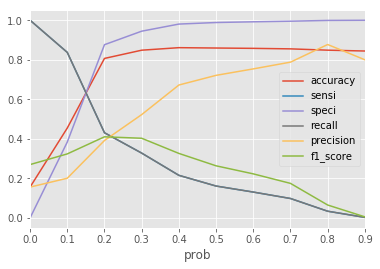

In [272]:
plt.figure(figsize = (15,8))
cutoff_df.plot.line(x = 'prob', y =['accuracy', 'sensi', 'speci', 'recall', 'precision', 'f1_score'])

In [273]:
result['final_pred'] = result['PROB'].map(lambda x: 1 if x>0.22 else 0)

In [274]:
final_med_result = pd.DataFrame(columns = ['med_PRED','med_TRUE'])
final_med_result['med_PRED'] = result['final_pred']
final_med_result['med_TRUE'] = y_med_train

In [275]:
lr = LogisticRegression()
lr.fit(x_high_train, y_high_train)

C:\Users\Dharmendra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [276]:
y_high_pred_train = lr.predict(x_high_train)
y_high_pred_test = lr.predict(x_high_test)

In [277]:
metrics.accuracy_score(y_high_train, y_high_pred_train)
#metrics.accuracy_score(y_high_test, y_high_pred_test)

0.9259259259259259

In [278]:
ypred_prob = lr.predict_proba(x_high_train)

In [279]:
result = pd.DataFrame()
result['PROB'] = ypred_prob[:,1]
nums = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in nums:
    result[i] = result['PROB'].map(lambda x: 1 if x > i else 0)

In [280]:
result.head()

,PROB,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.072123,1,0,0,0,0,0,0,0,0,0
1,0.044973,1,0,0,0,0,0,0,0,0,0
2,0.033110,1,0,0,0,0,0,0,0,0,0
3,0.008143,1,0,0,0,0,0,0,0,0,0
4,0.010686,1,0,0,0,0,0,0,0,0,0


In [281]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci', 'recall', 'precision', 'f1_score'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

for i in nums:
    cm1 = metrics.confusion_matrix(y_high_train, result[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    recal = metrics.recall_score(y_high_train, result[i])
    preci = metrics.precision_score(y_high_train, result[i])
    f1 = metrics.f1_score(y_high_train, result[i])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci, recal, preci, f1]
print(cutoff_df)

     prob  accuracy  sensi  speci  recall  precision  f1_score
0.0   0.0  0.074074   1.00   0.00    1.00   0.074074  0.137931
0.1   0.1  0.777778   1.00   0.76    1.00   0.250000  0.400000
0.2   0.2  0.981481   0.75   1.00    0.75   1.000000  0.857143
0.3   0.3  0.981481   0.75   1.00    0.75   1.000000  0.857143
0.4   0.4  0.925926   0.00   1.00    0.00   0.000000  0.000000
0.5   0.5  0.925926   0.00   1.00    0.00   0.000000  0.000000
0.6   0.6  0.925926   0.00   1.00    0.00   0.000000  0.000000
0.7   0.7  0.925926   0.00   1.00    0.00   0.000000  0.000000
0.8   0.8  0.925926   0.00   1.00    0.00   0.000000  0.000000
0.9   0.9  0.925926   0.00   1.00    0.00   0.000000  0.000000


C:\Users\Dharmendra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Dharmendra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Dharmendra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Dharmendra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Dharmendra\Anaconda3\lib\site-packages\sklearn\metrics\clas

<Figure size 1080x576 with 0 Axes>

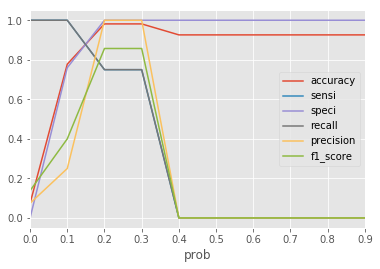

In [282]:
plt.figure(figsize = (15,8))
cutoff_df.plot.line(x = 'prob', y =['accuracy', 'sensi', 'speci', 'recall', 'precision', 'f1_score'])

In [283]:
result['final_pred'] = result['PROB'].map(lambda x: 1 if x>0.25 else 0)

In [284]:
final_high_result = pd.DataFrame(columns = ['high_PRED','high_TRUE'])
final_high_result['high_PRED'] = result['final_pred']
final_high_result['high_TRUE'] = y_high_train

In [295]:
metrics.confusion_matrix(y_high_train, final_high_result['high_PRED'])

array([[50,  0],
       [ 1,  3]], dtype=int64)

In [296]:
TP1 = 1494
TN1 = 672
FP1 = 435
FN1 = 416

TP2 = 5546
TN2 = 1132
FP2 = 872
FN2 = 912

TP3 = 7164
TN3 = 603
FP3 = 824
FN3 = 873

TP4 = 50
TN4 = 3
FP4 = 0
FN4 = 1

In [394]:
TP = TP1 + TP2 + TP3 + TP4
TN = TN1 + TN2 + TN3 + TN4
FP = FP1 + FP2 + FP3 + FP4
FN = FN1 + FN2 + FN3 + FN4

In [395]:
TP,FP,FN,TN

(14228, 2157, 2188, 2424)

In [396]:
recal = TN/(FN+TN)
prec = TN/(FP+TN)
acc = (TP+TN)/(TP+TN+FP+FN)
f1_scor = 2*(recal*prec)/(recal+prec)
print(acc)
print(f1_scor)

0.7930656760489594
0.5273577722179918


In [349]:
recal

0.5225498699045967

In [220]:
metrics.recall_score(ytrain, ypred_train)

0.2981661272923409

In [218]:
metrics.f1_score(ytrain, ypred_train)

0.4112483261419432

In [219]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [100]:
#fpr, tpr, thresholds = metrics.roc_curve(list(ytrain), list(ypred_prob[:1]), drop_intermediate = False )
#draw_roc(ytrain, ypred_prob)

In [113]:
df_train.head()

,LIMIT_BAL,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,DEFAULT,RISK_VALUE,BILL_VALUE,RISK_VALUE_AVG,RISK_VALUE_CAT,PC1_BILL,PC2_BILL,SEX_Male,EDUCATION_High School,EDUCATION_Others,EDUCATION_University,EDUCATION_Unknown,MARRIAGE_Others,MARRIAGE_Single,MARRIAGE_Unknown
28465,240000,40,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,1,-12,0,-2.000000,0,-110707.185536,-1602.245282,0,0,0,0,0,0,0,0
27622,50000,23,-1,-1,-1,-1,-1,-1,2548,2321,4800,9810,660,2980,0,-6,92,-1.000000,0,-101317.202791,-4599.774198,0,0,0,0,0,0,1,0
28376,50000,36,2,2,2,2,0,0,0,4700,0,2004,3500,0,0,8,-210740,1.333333,2,-1361.897855,-5011.280662,0,0,0,1,0,0,0,0
10917,200000,54,6,5,4,3,2,2,0,0,0,0,0,0,0,22,-416300,3.666667,3,109476.844153,36330.690204,0,1,0,0,0,0,0,0
27234,240000,35,-1,-1,-1,0,-1,-1,2017,21817,1120,13434,22772,22820,0,-5,-15765,-0.833333,0,-79800.769858,-20206.874926,1,0,0,0,0,0,0,0


In [114]:
rf = RandomForestClassifier()
rf.fit(xtrain, ytrain)

C:\Users\Dharmendra\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [115]:
ypred_rf = rf.predict(xtest)

In [116]:
metrics.accuracy_score(ytest,ypred_rf)

0.8057777777777778

In [170]:
prob = rf.predict_proba(xtrain)

In [160]:
ypred_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [161]:
prob[:,1]

array([0. , 0. , 0.3, ..., 0.1, 0.1, 0. ])

In [149]:
df_train['DEFAULT'].shape

(21000,)

In [171]:
result = pd.DataFrame(prob[:,1])
result.columns = ['PROB']
result['DEFAULT'] = df_train['DEFAULT']
result.shape

(21000, 2)

In [172]:

nums = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in nums:
    result[i] = result['PROB'].map(lambda x: 1 if x > i else 0)

In [173]:
result.head()

,PROB,DEFAULT,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.5,1.0,1,1,1,1,1,0,0,0,0,0
1,0.1,1.0,1,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0,0,0,0,0,0,0,0,0,0
3,0.2,NaN,1,1,0,0,0,0,0,0,0,0
4,0.1,0.0,1,0,0,0,0,0,0,0,0,0


In [176]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci', 'recall', 'precision', 'f1_score'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

for i in nums:
    cm1 = metrics.confusion_matrix(ytrain, result[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    recal = metrics.recall_score(ytrain, result[i])
    preci = metrics.precision_score(ytrain, result[i])
    f1 = metrics.f1_score(ytrain, result[i])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci, recal, preci, f1]
print(cutoff_df)

     prob  accuracy     sensi     speci    recall  precision  f1_score
0.0   0.0  0.661143  1.000000  0.564077  1.000000   0.396540  0.567889
0.1   0.1  0.875381  1.000000  0.839684  1.000000   0.641163  0.781352
0.2   0.2  0.956667  0.999145  0.944499  0.999145   0.837576  0.911254
0.3   0.3  0.985000  0.994867  0.982173  0.994867   0.941129  0.967252
0.4   0.4  0.990048  0.974551  0.994487  0.974551   0.980633  0.977582
0.5   0.5  0.978810  0.909110  0.998775  0.909110   0.995317  0.950263
0.6   0.6  0.951714  0.784645  0.999571  0.784645   0.998096  0.878592
0.7   0.7  0.911048  0.600727  0.999939  0.600727   0.999644  0.750468
0.8   0.8  0.860714  0.374465  1.000000  0.374465   1.000000  0.544889
0.9   0.9  0.810000  0.146707  1.000000  0.146707   1.000000  0.255875


<Figure size 1080x576 with 0 Axes>

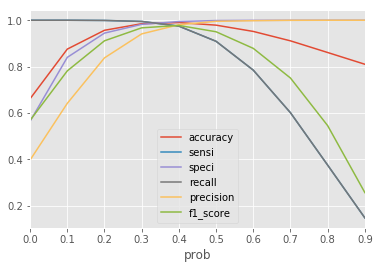

In [177]:
plt.figure(figsize = (15,8))
cutoff_df.plot.line(x = 'prob', y =['accuracy', 'sensi', 'speci', 'recall', 'precision', 'f1_score'])

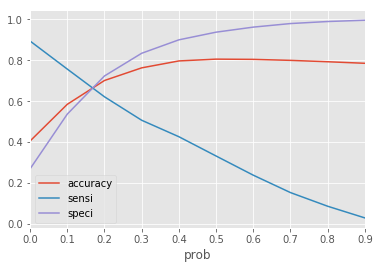

In [167]:
cutoff_df.plot.line(x = 'prob', y =['accuracy', 'sensi', 'speci'])

In [37]:
metrics.classification_report(ytest)

TypeError: classification_report() missing 1 required positional argument: 'y_pred'

In [36]:
y_train.values()

NameError: name 'y_train' is not defined